# Machine Learning Exercises in Python
# Part 2: Multivariate Linear Regression

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/

In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

ex_dir = lambda n: '~/courses/Machine Learning/machine-learning-ex{}/ex{}'.format(n, n)

## Visualising the Data 

In [90]:
path = ex_dir(1) + '/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Normalisation

In [91]:
data2 = (data - data.mean()) / data.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Gradient Descent

In [92]:
def computeCost(X, y, theta):
    error = np.power(X * theta.T - y, 2)
    return np.sum(error) / (2 * len(X))

def prepareData(data):
    if not 'Ones' in data:
        data.insert(0, 'Ones', 1)
    
    cols = data.shape[1]
    X = np.matrix(data.iloc[:,0:cols-1].values)
    y = np.matrix(data.iloc[:,cols-1:cols].values)
    return X, y

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - alpha / X.shape[0] * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

X2, y2 = prepareData(data2)
theta2 = np.matrix(np.array([0,0,0]))  

In [93]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent pm the linear data
final_theta2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
final_cost2 = computeCost(X2, y2, final_theta2)
print('Final theta: {}\nFinal cost: {}'.format(final_theta2, final_cost2))

Final theta: [[ -1.04077503e-16   8.78503652e-01  -4.69166570e-02]]
Final cost: 0.13070336960771892


## Plotting the Cost Function

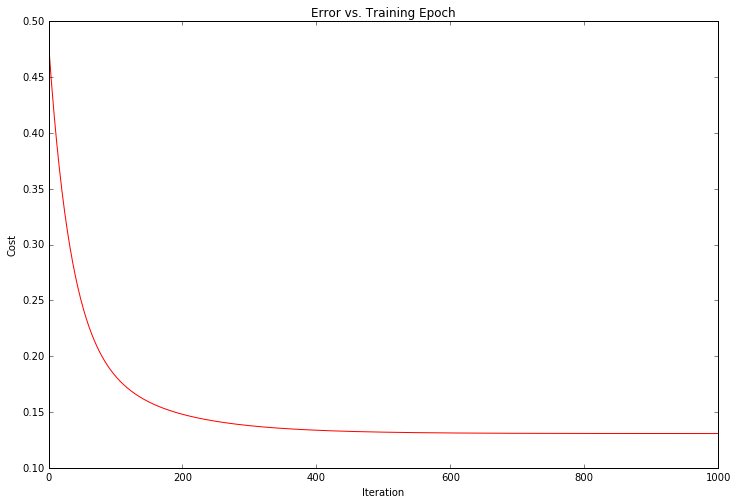

In [94]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Selecting Learning Rates

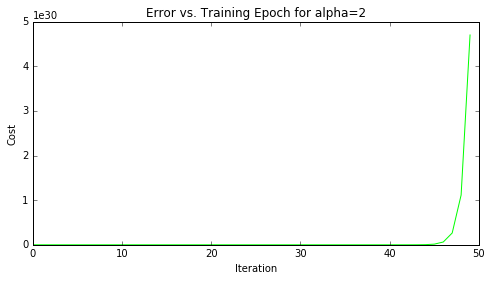

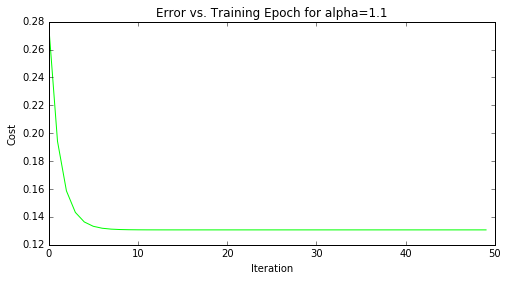

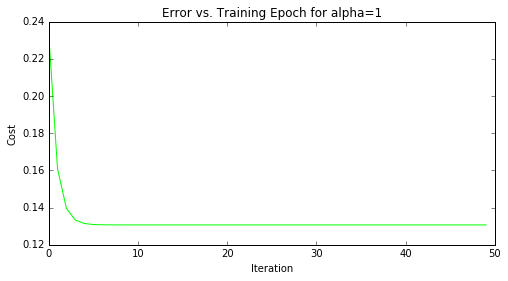

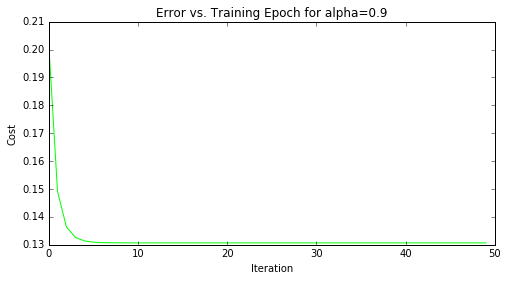

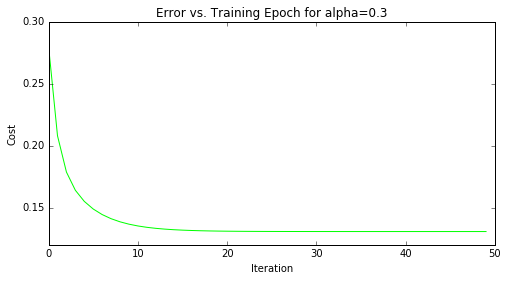

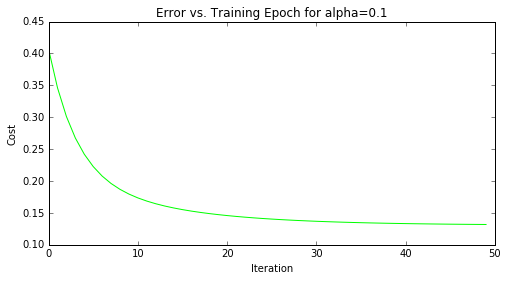

In [95]:
rates = [2, 1.1, 1, 0.9, 0.3, 0.1]
iters = 50

for r in rates:
    _, r_cost = gradientDescent(X2, y2, theta2, r, iters)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(np.arange(iters), r_cost, 'lime')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs. Training Epoch for alpha={}'.format(r))

## Normal Equations

In [168]:
from numpy.linalg import inv as inv

theta_calc = (inv(X.T * X) * X.T * y).T
print('Theta from gradient descent:', final_theta2)
print('Theta from normal equation:', theta_calc)

test = [1, 1650, 3]
mean = np.array(data.mean()[:2])
std = np.array(data.std()[:2])
test_norm = np.insert((np.array(test[1:]) - mean) / std, 0, 1)

y_norm = test_norm * final_theta2.T
y_test = y_norm * data.std()['Price'] + data.mean()['Price']
print('\nPredictions for x = [1650, 3]:')
print(' - with gradient descent theta: {:,.2f}'.format(y_test[0,0]))
print(' - with normal equation theta: {:,.2f}'.format((test * theta_calc.T)[0,0]))

Theta from gradient descent: [[ -1.04077503e-16   8.78503652e-01  -4.69166570e-02]]
Theta from normal equation: [[ 89597.9095428     139.21067402  -8738.01911233]]

Predictions for x = [1650, 3]:
 - with gradient descent theta: 293,251.86
 - with normal equation theta: 293,081.46
